In [ ]:
!pip install ml_metrics
import ml_metrics as metrics

In [ ]:
Truth = [1,0,1,0]
prediction = [1,0,1,0]
metrics.mapk([Truth],[prediction],3)

0.6666666666666666

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
!ln -s /content/drive/My\ Drive/ /mydrive

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_csv('/mydrive/ManojSirIntern/Normalised_data_final.csv')

In [ ]:
df

,Unnamed: 0,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023,1024,1025,1026,1027,1028,1029,1030,1031,1032,1033,OutPut
0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.483414,0.966827,0.842016,0.825816,0.930746,0.779426,0.752550,0.761386,0.778322,...,0.436287,0.090571,0.279077,0.693642,0.359707,0.333935,0.329885,0.192924,0.390634,0.399102,0.704319,0.662715,0.587239,0.193660,0.307426,0.376643,0.371120,0.427819,0.453592,0.448437,0.769117,0.260300,0.232318,0.315158,0.385847,0.301903,0.461323,0.290858,0.315894,0.372593,0.366702,0.622952,0.279813,1.000000,0.664556,0.974559,0.690328,0.656824,0.549317,1
1,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
2,2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
3,3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.037017,0.074034,0.032546,0.038984,0.058655,0.049714,0.036481,0.022890,0.031474,...,0.717811,0.820458,0.592990,0.691345,1.000000,0.973176,0.681688,0.921674,1.000000,0.891273,1.000000,0.623391,0.913805,0.680973,0.471745,0.500358,0.508226,0.383405,0.566881,0.478898,0.966023,0.431330,0.516094,0.618741,0.606223,0.295064,0.814020,0.503219,0.740343,0.232475,0.357296,0.421316,0.664878,0.958512,0.664163,0.521817,0.458512,0.692775,0.569385,1
4,4,0.144214,0.170073,0.189467,0.227759,0.177035,0.211348,0.191954,0.175543,0.169576,0.042270,0.043761,0.280471,0.189467,0.323736,0.457009,0.387389,0.349097,0.360535,0.316774,0.319757,0.392362,0.370978,0.347606,0.395345,0.377443,0.165100,0.179522,0.266050,0.235218,0.183003,0.175543,0.536078,0.439604,0.416232,0.393356,0.395843,0.370481,0.265055,0.321249,...,0.500771,1.000000,0.410761,0.794669,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.801631,0.640012,0.729027,0.451539,0.442091,0.709135,0.000000,0.000000,0.247650,0.495301,0.553484,0.500771,0.484858,0.475409,0.471431,0.527127,0.500274,0.536576,0.542543,0.883684,0.515689,0.761848,0.671838,0.608185,0.730021,0.813069,0.902084,0.915510,0.860809,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [ ]:
df.drop(['Unnamed: 0'],axis =1,inplace=True)

In [ ]:
Y = df['OutPut']
df.drop(['OutPut'],axis=1,inplace=True)

In [ ]:
Y

0        1
1        1
2        1
3        1
4        1
        ..
33836    0
33837    0
33838    0
33839    0
33840    0
Name: OutPut, Length: 33841, dtype: int64

In [ ]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023,1024,1025,1026,1027,1028,1029,1030,1031,1032,1033
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.483414,0.966827,0.842016,0.825816,0.930746,0.779426,0.752550,0.761386,0.778322,0.742241,...,0.769117,0.436287,0.090571,0.279077,0.693642,0.359707,0.333935,0.329885,0.192924,0.390634,0.399102,0.704319,0.662715,0.587239,0.193660,0.307426,0.376643,0.371120,0.427819,0.453592,0.448437,0.769117,0.260300,0.232318,0.315158,0.385847,0.301903,0.461323,0.290858,0.315894,0.372593,0.366702,0.622952,0.279813,1.000000,0.664556,0.974559,0.690328,0.656824,0.549317
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.037017,0.074034,0.032546,0.038984,0.058655,0.049714,0.036481,0.022890,0.031474,0.035050,...,0.719242,0.717811,0.820458,0.592990,0.691345,1.000000,0.973176,0.681688,0.921674,1.000000,0.891273,1.000000,0.623391,0.913805,0.680973,0.471745,0.500358,0.508226,0.383405,0.566881,0.478898,0.966023,0.431330,0.516094,0.618741,0.606223,0.295064,0.814020,0.503219,0.740343,0.232475,0.357296,0.421316,0.664878,0.958512,0.664163,0.521817,0.458512,0.692775,0.569385
4,0.144214,0.170073,0.189467,0.227759,0.177035,0.211348,0.191954,0.175543,0.169576,0.042270,0.043761,0.280471,0.189467,0.323736,0.457009,0.387389,0.349097,0.360535,0.316774,0.319757,0.392362,0.370978,0.347606,0.395345,0.377443,0.165100,0.179522,0.266050,0.235218,0.183003,0.175543,0.536078,0.439604,0.416232,0.393356,0.395843,0.370481,0.265055,0.321249,0.328709,...,0.699189,0.500771,1.000000,0.410761,0.794669,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.801631,0.640012,0.729027,0.451539,0.442091,0.709135,0.000000,0.000000,0.247650,0.495301,0.553484,0.500771,0.484858,0.475409,0.471431,0.527127,0.500274,0.536576,0.542543,0.883684,0.515689,0.761848,0.671838,0.608185,0.730021,0.813069,0.902084,0.915510,0.860809
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

In [ ]:
x = np.array(df)
y = np.array(Y)

In [ ]:
print(x.shape)
print(y.shape)

(33841, 1034)
(33841,)


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.40)

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(20304, 1034)
(20304,)
(13537, 1034)
(13537,)


#CNN Model

In [ ]:
x_train1 = x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test1 = x_test.reshape(x_test.shape[0],x_test.shape[1],1)
x_train2 = x_train.reshape(x_train.shape[0],94,11)
x_test2 = x_test.reshape(x_test.shape[0],94,11)
#y_train = y_train.reshape(y_train.shape[0],1)
#y_test = y_test.reshape(y_test.shape[0],1)

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(20304, 1034)
(20304,)
(13537, 1034)
(13537,)


In [ ]:
from keras.models import Sequential

from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.utils import to_categorical

from keras.optimizers import SGD





In [ ]:
from keras.models import Model
from keras.layers import Input

from keras.layers.merge import concatenate

from keras.layers import Flatten

In [ ]:
n_steps,n_features = 1034,1
visible1 = Input(shape=(n_steps, n_features))
temp1 = Conv1D(filters=32, kernel_size=3, activation='relu',padding = 'same')(visible1)
temp11 = Flatten()(temp1)
cnn1 = Dense(500, activation='relu')(temp11)

In [ ]:
n_steps,n_features = 94,11
visible2 = Input(shape=(n_steps, n_features))
temp2 = Conv1D(filters=64, kernel_size=3, activation='relu',padding = 'same')(visible2)
temp12 = MaxPooling1D(pool_size=2)(temp2)
temp22 = Conv1D(filters=32, kernel_size=3, activation='relu')(temp12)
temp33 = MaxPooling1D(pool_size=2)(temp22)
temp44 = Flatten()(temp33)
cnn2 = Dense(500, activation='relu')(temp44)



In [ ]:
merge = concatenate([cnn1, cnn2])
dense = Dense(300, activation='relu')(merge)
dense2 = Dense(300, activation='relu')(dense)
output = Dense(1, activation='sigmoid')(dense2)

In [ ]:
model = Model(inputs=[visible1, visible2], outputs=output)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [ ]:
model.summary()

Model: "functional_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            [(None, 94, 11)]     0                                            
__________________________________________________________________________________________________
conv1d_9 (Conv1D)               (None, 94, 64)       2176        input_7[0][0]                    
__________________________________________________________________________________________________
max_pooling1d_6 (MaxPooling1D)  (None, 47, 64)       0           conv1d_9[0][0]                   
__________________________________________________________________________________________________
input_6 (InputLayer)            [(None, 1034, 1)]    0                                            
_______________________________________________________________________________________

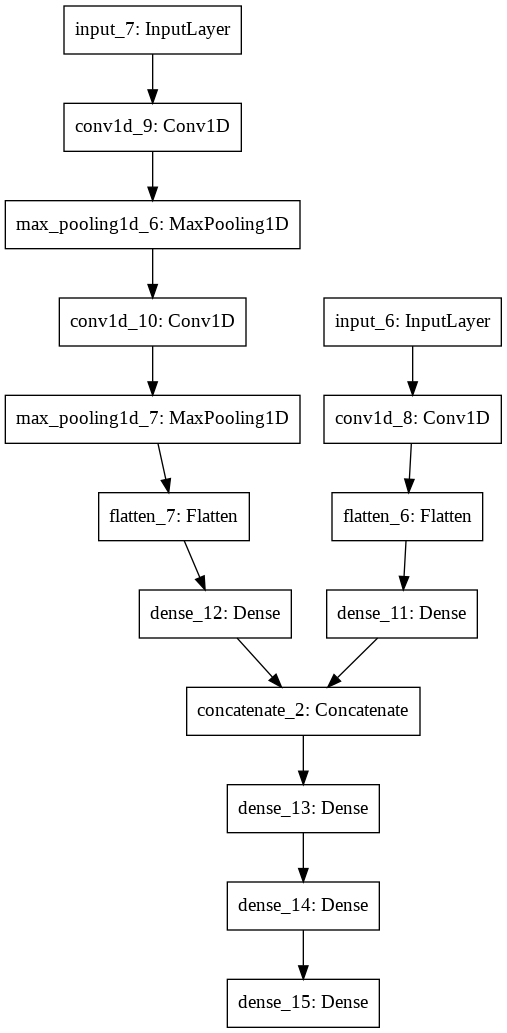

In [ ]:
from keras.utils import plot_model
plot_model(model, to_file='model.png')

In [ ]:
train_x = [x_train1, x_train2]
test_x = [x_test1,x_test2]

In [ ]:
history = model.fit(train_x, y_train, epochs=50, verbose=1,batch_size=5, validation_data=(test_x, y_test))


Epoch 1/50
4061/4061 [==============================] - 26s 6ms/step - loss: 0.3303 - accuracy: 0.8945 - val_loss: 0.3114 - val_accuracy: 0.8927
Epoch 2/50
4061/4061 [==============================] - 25s 6ms/step - loss: 0.2831 - accuracy: 0.9019 - val_loss: 0.2889 - val_accuracy: 0.8994
Epoch 3/50
4061/4061 [==============================] - 26s 6ms/step - loss: 0.2366 - accuracy: 0.9148 - val_loss: 0.2910 - val_accuracy: 0.9033
Epoch 4/50
4061/4061 [==============================] - 25s 6ms/step - loss: 0.1826 - accuracy: 0.9326 - val_loss: 0.3514 - val_accuracy: 0.9021
Epoch 5/50
4061/4061 [==============================] - 25s 6ms/step - loss: 0.1235 - accuracy: 0.9567 - val_loss: 0.4257 - val_accuracy: 0.8976
Epoch 6/50
4061/4061 [==============================] - 25s 6ms/step - loss: 0.0874 - accuracy: 0.9712 - val_loss: 0.5022 - val_accuracy: 0.8967
Epoch 7/50
4061/4061 [==============================] - 25s 6ms/step - loss: 0.0678 - accuracy: 0.9785 - val_loss: 0.5927 - val_ac

In [ ]:
# evaluate the model
score_train, train_acc = model.evaluate(train_x, y_train, verbose=0)
score_test, test_acc = model.evaluate(test_x, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 0.957, Test: 0.956


#Prediction

In [ ]:
y_pred1 = model.predict(test_x)
#probability Prediction

In [ ]:
y_pred = []
y_pred_p = []
for i in y_pred1:
  y_pred_p.append(i)
  if(i>0.5):
    y_pred.append(1)
  else:
    y_pred.append(0)
print(len(y_pred))
print(len(y_pred_p))


13537
13537


In [ ]:
count=0
for i in y_pred:
  if (i!=0):
    count=count+1
print('predicted 1 : ',count)

count=0
for i in y_test:
  if (i!=0):
    count=count+1
print('actual 1 : ',count)

predicted 1 :  1118
actual 1 :  1445


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9558986481495162

In [ ]:
#Normalised False give no of correctly clasify sample
#Normalised True give percentage accuracy
count = accuracy_score(y_test, y_pred, normalize=False)
print('No of correctly classify sample ',count, ' out of ',len(y_test))

No of correctly classify sample  12940  out of  13537


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98     12092
           1       0.88      0.68      0.77      1445

    accuracy                           0.96     13537
   macro avg       0.92      0.83      0.87     13537
weighted avg       0.95      0.96      0.95     13537



#Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[11957   135]
 [  462   983]]


In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix, without normalization


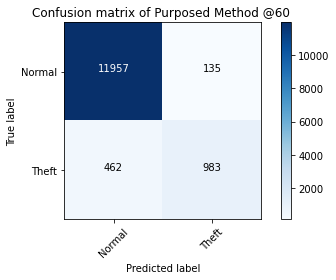

In [ ]:

np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cm, classes=['Normal', 'Theft'],title='Confusion matrix of Purposed Method @60 ')

##Some Error

Confusion matrix, without normalization
[[5938  106]
 [ 620  105]]
Normalized confusion matrix
[[0.98246195 0.01753805]
 [0.85517241 0.14482759]]


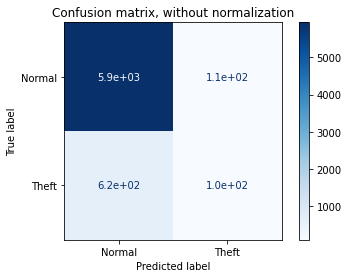

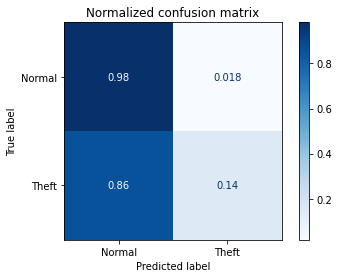

In [ ]:
# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf, x_test, y_test,
                                 display_labels=['Normal','Theft'],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

#ROC AUC

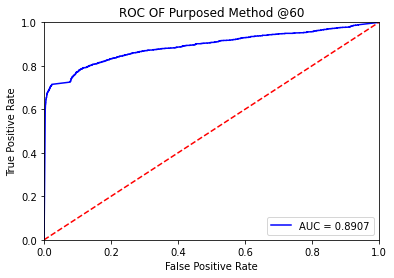

In [ ]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
#probs = model.predict(x_test)
preds = y_pred_p
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('ROC OF Purposed Method @60')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.4f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()